In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn import preprocessing

# Exploratory Data Analysis


# I. Import Data

In [2]:
or_dat = pd.read_csv('data/orders_dataset.csv',sep=',')
or_item = pd.read_csv('data/order_items_dataset.csv',sep=',')
cust = pd.read_csv('data/customers_dataset.csv',sep=',')
or_pay = pd.read_csv('data/order_payments_dataset.csv',sep=',')
or_review = pd.read_csv('data/order_reviews_dataset.csv',sep=',')
products = pd.read_csv('data/products_dataset.csv',sep=',')
pro_category= pd.read_csv('data/product_category_name_translation.csv',sep=',')
geo = pd.read_csv('data/geolocation_dataset.csv',sep=',')
sell =pd.read_csv('data/sellers_dataset.csv',sep=',')

In [3]:
or_dat.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


It can be seen that *order* is a dataset that contains a collection of orders or purchasest. Next, *load* the *customer* dataset.

In [4]:
cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


The *customer* dataset contains information about *customer*. Next, *load* the product dataset.

In [5]:
or_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


The product dataset is a collection of products purchased by *customers*. Furthermore, the three *loaded* pieces of data then go through the *pre-processing* stage, so they can provide valid and useful insights for client.

# II. Pre-Processing
----
The first step in this processing is *Join Data*. To facilitate analysis, the data is first combined into a dataset.

## 1. Join Data

This step begins with first analyzing the variables contained in each dataset.

In [6]:
or_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In the *order* dataset there are seven variables, which have the following roles:


1. order_id: id number of each order
2. customer_id: id number of each customer
3. order_status: order status, such as 'delivered'
4. order_purchase_timestamp: order payment time
5. order_delivered_carrier_date: the time the delivery service has sent the goods
6. order_delivered_customer_date: the time the order was received by the buyer



In [7]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In the *customer* dataset there are five variables, which have the following roles:


1. customer_id: id number of each customer
2. customer_unique_id: unique id number of each customer
3. customer_zip_code_prefix: the first three digits of the customer's zip code address
4. customer_city: city of the customer's address
5. customer_state: the state of the customer's address

In [8]:
or_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In the *product* dataset there are seven variables, which have the following roles:


1. order_id: id number of each order
2. order_item_id: id number of each item in an order
3. product_id: id number of each product
4. seller_id: id number of each seller
5. shipping_limit_date: time limit until order delivery
6. price: total order price for each order
7. freight_value: the price of shipping goods for each order

Based on the variables loaded in the dataset. Therefore, to combine *order* dataset with *customer* variable *customer_id* is used.

In [9]:
order_cust = pd.merge(or_dat,cust,on='customer_id',how='left') 
order_cust.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


On the other hand, to combine the *order* dataset with the product *order_id* is used.Di sisi lain, untuk menggabungkan dataset *order* dengan produk digunakan *order_id*.

In [10]:
df = pd.merge(order_cust,or_item, on='order_id',how="left")
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In the analysis of these variables, it appears that not all variables are useful for analysis. Therefore, the next step is to * remove * useless variables or * redundant * roles with other variables.

## 2. Removing Variabel

First of all, it is necessary to determine in advance which variables are useful in this analysis.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_id                    113425 non-null  object 
 2   order_status                   113425 non-null  object 
 3   order_purchase_timestamp       113425 non-null  object 
 4   order_approved_at              113264 non-null  object 
 5   order_delivered_carrier_date   111457 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  113425 non-null  object 
 8   customer_unique_id             113425 non-null  object 
 9   customer_zip_code_prefix       113425 non-null  int64  
 10  customer_city                  113425 non-null  object 
 11  customer_state                 113425 non-null  object 
 12  order_item_id                 

Note that,
1. *customer_id* has been represented and informed by *customer_unique_id*
2. There is no *seller* dataset in this project. Therefore, *seller_id* cannot provide any information.
3. *shipping_limit_date* will not be analyzed further in this project because in general the deadline (time limit) is fixed and depends on the date of payment by the customer, so the insights that can be explored are also limited.
4. *customer_zip_code_prefix* is less useful due to the absence of *langtitude* and *longitude* data. In addition, information regarding the whereabouts of *customer* is adequately represented by *customer_city* and *customer_state*.

Therefore, the four variables were discarded.

In [12]:
#karena 'customer_id', 'seller_id', 'shipping_limit_date','customer_zip_code_prefix' tidak akan digunakan maka akan dihapus saja
df = df.drop(['customer_id', 'seller_id','shipping_limit_date','customer_zip_code_prefix'], axis = 1) 

On the other hand, 'order_item_id' and 'product_id' contain only ids. Even so, these two variables cannot be eliminated even though they will not provide any insight. This is because *order_id* indicates a different product order id and *product_id* indicates the product purchased. By removing these two variables, some orders will appear the same, causing duplicate data.

In [13]:
df=df[df['order_status']=='delivered']
df.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72


Next we will fetch only data that has order_status delivered. This is because of the assumption that if the order_status is not delivered then the transaction is considered canceled or still in process so it cannot be considered as an advantage for the company. Therefore, the *order_status* variable is no longer useful for this analysis.

In [14]:
df.drop(['order_status'], axis = 1, inplace=True)

The next step is to transform data based on the appropriate data type.

## 3. Data Transformation

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 113424
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   order_purchase_timestamp       110197 non-null  object 
 2   order_approved_at              110182 non-null  object 
 3   order_delivered_carrier_date   110195 non-null  object 
 4   order_delivered_customer_date  110189 non-null  object 
 5   order_estimated_delivery_date  110197 non-null  object 
 6   customer_unique_id             110197 non-null  object 
 7   customer_city                  110197 non-null  object 
 8   customer_state                 110197 non-null  object 
 9   order_item_id                  110197 non-null  float64
 10  product_id                     110197 non-null  object 
 11  price                          110197 non-null  float64
 12  freight_value                 

Note that for variables 2-7 they should be of type *datetime*.

In [16]:
# kolom 2 'order_purchase_timestamp','order_approved_at','order_delivered_carrier_date'
# 'order_delivered_customer_date', 'order_estimated_delivery_date' akan diganti menjadi type date
df.iloc[:, 1:6] = df.iloc[:, 1:6].apply(pd.to_datetime, errors='coerce')

Also, even though *order_item_id* is a number, that number is just a code. Therefore, *order_item_id* is supposed to be *string* data type.

In [17]:
#kolom 'order_item_id' dan juga akan diganti masing-masing menjadi string
df['order_item_id'] = df['order_item_id'].astype(str)

Now the data types used in this analysis are as follows.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 113424
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_purchase_timestamp       110197 non-null  datetime64[ns]
 2   order_approved_at              110182 non-null  datetime64[ns]
 3   order_delivered_carrier_date   110195 non-null  datetime64[ns]
 4   order_delivered_customer_date  110189 non-null  datetime64[ns]
 5   order_estimated_delivery_date  110197 non-null  datetime64[ns]
 6   customer_unique_id             110197 non-null  object        
 7   customer_city                  110197 non-null  object        
 8   customer_state                 110197 non-null  object        
 9   order_item_id                  110197 non-null  object        
 10  product_id                     110197 non-null  object        
 11  

In [19]:
df.head()

,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72


## 4. Duplicate Removal

The next step, check whether there is data duplication in this dataset.

In [20]:
#pengecekan jumlah banyak baris yang sama (duplikat data)
df.duplicated().sum()

0

## 5. Noise Detection

Then, the characteristics of the dataset are seen and analyzed whether there is data showing values that are outside the characteristics. This can show that the data is *noise*.

In [21]:
# melihat statistika deskriptif dari data untuk melihat noise (data-data yang tidak masuk akal)
df.describe()
# nilai min dari 'freight_value' ada yang 0, dicurigai kemungkinan 
# adanya free ongkir, yang lainnya sepertinya juga masuk akal sehingga tidak ada noise

,price,freight_value
count,110197.000000,110197.000000
mean,119.980563,19.948598
std,182.299446,15.698136
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.900000,16.260000
75%,134.170000,21.150000
max,6735.000000,409.680000


Apparently, through this analysis there was no data showing characteristics that were 'strange' or different on their own.

## 6. Missing Value Detection


In [22]:
df.isnull().sum()

order_id                          0
order_purchase_timestamp          0
order_approved_at                15
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
customer_unique_id                0
customer_city                     0
customer_state                    0
order_item_id                     0
product_id                        0
price                             0
freight_value                     0
dtype: int64

It can be seen that the *order_approved_at* variable contains a missing value indicating that a purchase is not approved by Olist. Meanwhile, *missing value* in *order_delivered_carrier_date* and *order_delivered_customer_date* indicates product arrival information that was not inputted into the dataset.

In [23]:
#persentasi missing data untuk setiap variabel kategorik dan numerik pada data
(df.isnull().sum()/len(df)).to_frame('persentase missing')

,persentase missing
order_id,0.000000
order_purchase_timestamp,0.000000
order_approved_at,0.000136
order_delivered_carrier_date,0.000018
order_delivered_customer_date,0.000073
order_estimated_delivery_date,0.000000
customer_unique_id,0.000000
customer_city,0.000000
customer_state,0.000000
order_item_id,0.000000


It can be seen that the percentage of missing data in this variable is very small

<AxesSubplot:>

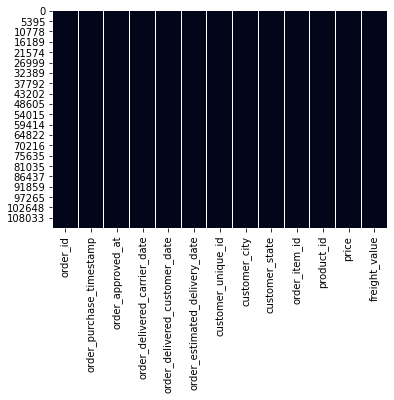

In [24]:
#gambaran heat map dari missing value untuk melihat persebaran missing value
sns.heatmap(df.isnull(), cbar=False)

The distribution of *missing value* seems random, so the missing value will be dropped with the condition: if there is at least one missing value in one of the columns, then the row is deleted

In [25]:
df.dropna(axis = 0, how = 'any', inplace = True)

In [26]:
df.isnull().sum()

order_id                         0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
price                            0
freight_value                    0
dtype: int64

In [27]:
#ukuran (baris,kolom) dari data yang telah siap untuk digunakan
df.shape

(110173, 13)

Based on this processing, now obtained data that is ready to be analyzed with 13 variables and 110173 rows.

## 7. Data Visualization

In the following sections, several aspects that can be used as information to increase their income are analyzed.

### A. Number of Purchases on *E-Commerce*

#### a. Trend of Number of Purchases in 2016 - 2018

In [28]:
df['purchase_year'] = df['order_purchase_timestamp'].dt.strftime('%Y') #dari data waktu yang ada, hanya ingin di ambil tahunnya saja
df['purchase_month'] = df['order_purchase_timestamp'].dt.strftime('%b') #dari data waktu yang ada, hanya ingin di ambil bulannya saja
df['purchase_yearmonth'] = df['order_purchase_timestamp'].dt.strftime('%Y%m') #dari data waktu yang ada, hanya ingin di ambil tahun dan bulannya saja
df['purchase_dayofweek'] = df['order_purchase_timestamp'].dt.strftime('%a') #dari data waktu yang ada, hanya ingin di ambil harinya saja
df['purchase_period'] = (df['order_purchase_timestamp'].dt.hour % 24 + 4) // 4 
df['purchase_period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True) #1 hari dibagi menjadi 6 periode waktu
df['month_num'] = df['purchase_month'].apply(lambda x: datetime.datetime.strptime(x, "%b").month) #nama bulan pada 'purchase_month' akan diubah menjadi angka

df.head()

,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,freight_value,purchase_year,purchase_month,purchase_yearmonth,purchase_dayofweek,purchase_period,month_num
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,29.99,8.72,2017,Oct,201710,Mon,Morning,10
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,2018,Jul,201807,Tue,Night,7
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,159.90,19.22,2018,Aug,201808,Wed,Morning,8
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,2017,Nov,201711,Sat,Evening,11
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,2018,Feb,201802,Tue,Night,2


Text(0.5, 1.0, 'Tren Jumlah Pembelian dari Tahun 2017 hingga 2018')

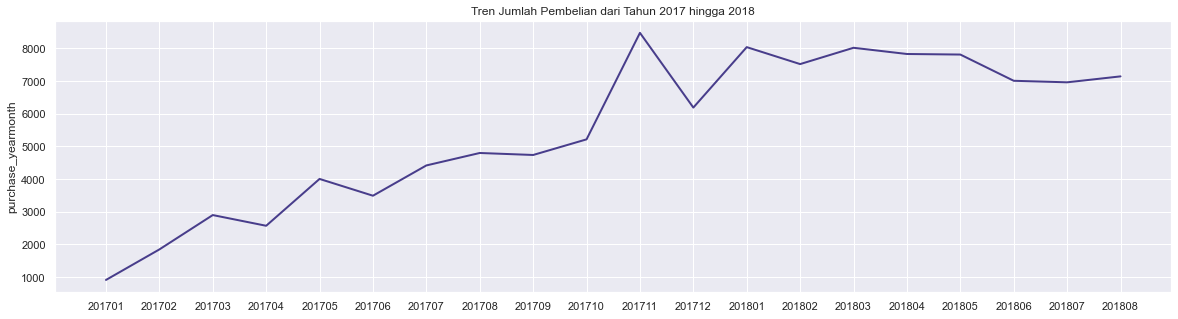

In [29]:
#plot dari tren pembelian dari tahun 2016 hingga 2018 dengan menggunakan line plot
sns.set(rc={'figure.figsize':(20,5)}) #untuk ukuran plot
sns.lineplot(data=df['purchase_yearmonth'].value_counts().sort_index()[3:], 
             color='darkslateblue', linewidth=2)
plt.title('Tren Jumlah Pembelian dari Tahun 2017 hingga 2018') #judul dari plot

From the *line plot* above it can be seen that the sales trend
continues to increase even though there were some slight declines


In [30]:
cols = ['purchase_year', 'purchase_yearmonth'] 
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1) #'purchase_year', 'purchase_yearmonth' akan diubah type datanya menjadi integer

#### b. Tendency of Customers to Buy on *E-Commerce*

C:\Users\agusa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Jumlah Pembelian')

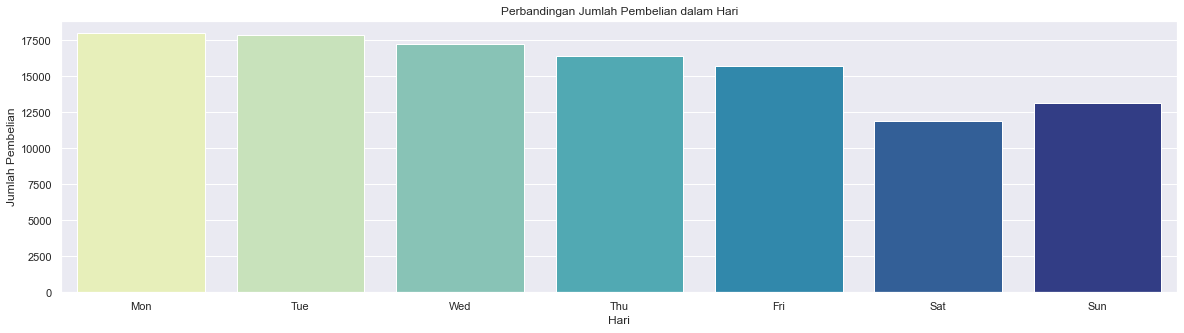

In [31]:
#bar plot dari banyaknya purchase dalam hari
order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sns.set(rc={'figure.figsize':(20,5)}) #ukuran plot
sns.countplot(df['purchase_dayofweek'],data=df,palette='YlGnBu',order=order)
plt.title('Perbandingan Jumlah Pembelian dalam Hari') #judul dari plot
plt.xlabel('Hari') #label pada sumbu x
plt.ylabel('Jumlah Pembelian') #label pada sumbu y

It can be seen that the highest number of purchases is on Monday, while the least number of purchases is on Saturday

In [32]:
#untuk melihat total jumlah pembelian per hari
df['purchase_dayofweek'].value_counts()

Mon    17973
Tue    17857
Wed    17217
Thu    16431
Fri    15693
Sun    13126
Sat    11876
Name: purchase_dayofweek, dtype: int64

#### c. Tendency when customers buy on *E-Commerce*

C:\Users\agusa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Jumlah Pembelian')

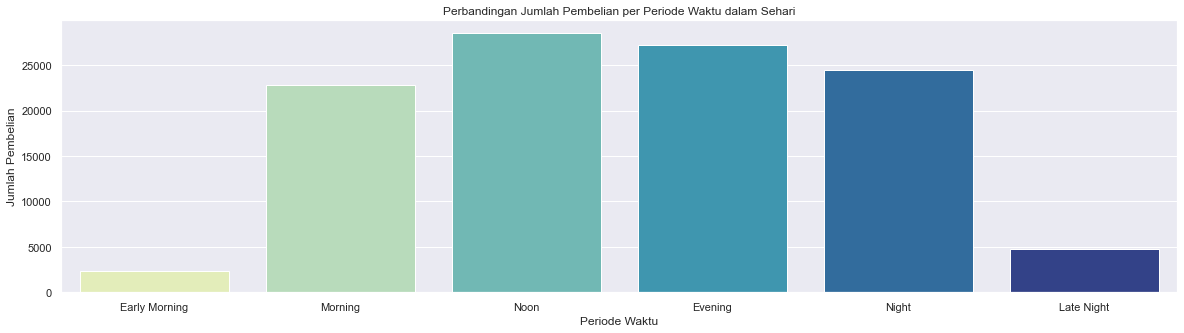

In [33]:
#bar plot dari banyaknya purchase dalam 6 periode waktu dalam sehari
order=['Early Morning', 'Morning', 'Noon', 'Evening', 'Night', 'Late Night']
sns.countplot(df['purchase_period'],data=df,palette='YlGnBu',order=order)
plt.title('Perbandingan Jumlah Pembelian per Periode Waktu dalam Sehari') #judul dari plot
plt.xlabel('Periode Waktu') #label pada sumbu x
plt.ylabel('Jumlah Pembelian') #label pada sumbu y

In [34]:
# untuk melihat total jumlah pembelian dalam 6 periodik waktu dalam sehari 
df['purchase_period'].value_counts()

Noon             28506
Evening          27279
Night            24432
Morning          22834
Late Night        4792
Early Morning     2330
Name: purchase_period, dtype: int64

#### d. Comparison of Number of Purchases Per Month in 2017 and 2018

C:\Users\agusa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Jumlah Pembelian')

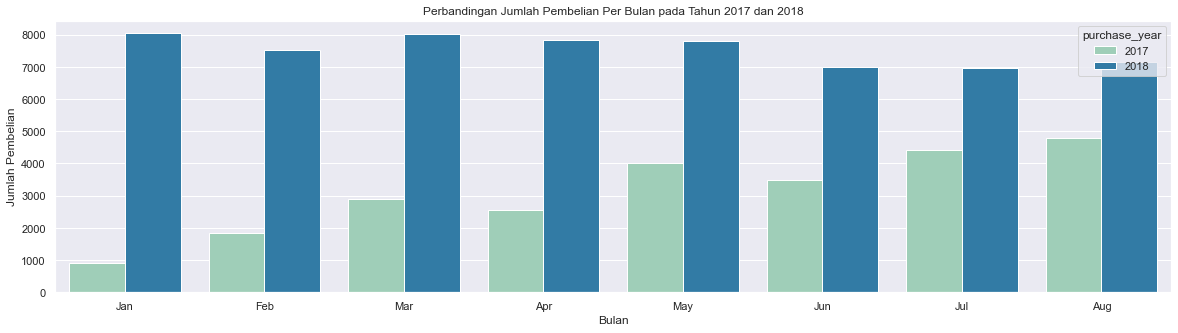

In [35]:
#bar chart dari perbandingan jumlah pembelian per bulan pada tahun 2017 dan 2018
df_compare = df.query('purchase_year in (2017, 2018) &  month_num <= 8')
year_orders = df_compare['purchase_year'].value_counts()
growth = int(round(100 * (1 + year_orders[2017] / year_orders[2018]), 0))
order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug'] #label sumbu x
sns.countplot(df_compare['purchase_month'],data=df_compare,hue='purchase_year',palette='YlGnBu',order=order)
plt.title('Perbandingan Jumlah Pembelian Per Bulan pada Tahun 2017 dan 2018') #judul plot
plt.xlabel('Bulan') #label pada sumbu x
plt.ylabel('Jumlah Pembelian') #label pada sumbu y

From the following *bar plot*, it can be seen that the number of purchases in 2018 was greater than in 2017 every month.
Sales efforts carried out by e-commerce  were quite optimal in 2018 compared to 2017.

In [36]:
#untuk melihat total jumlah pembelian per bulan pada tahun 2017
df_compare[df_compare['purchase_year']==2017]['purchase_month'].value_counts()

Aug    4797
Jul    4416
May    4003
Jun    3489
Mar    2897
Apr    2569
Feb    1845
Jan     911
Name: purchase_month, dtype: int64

In [37]:
#untuk melihat total jumlah pembelian per bulan pada tahun 2018
df_compare[df_compare['purchase_year']==2018]['purchase_month'].value_counts()

Jan    8037
Mar    8017
Apr    7827
May    7810
Feb    7518
Aug    7142
Jun    7007
Jul    6960
Name: purchase_month, dtype: int64

In [38]:
#### e. Jumlah Pembelian Berdasarkan Kota

In [39]:
df_city = df.groupby(by='customer_city', as_index=False).agg({'order_id':'count'}).sort_values(by='order_id', ascending=False).reset_index(drop=True) #untuk menghitung jumlah pembelian pada masing-masing kota
df_city_big = df_city.head() #untuk melihat 10 kota dengan jumlah pembelian terbesar
df_city_small = df_city.tail(20) #untuk melihat 10 kota dengan jumlah pembelian terbesar

Text(0, 0.5, 'Kota')

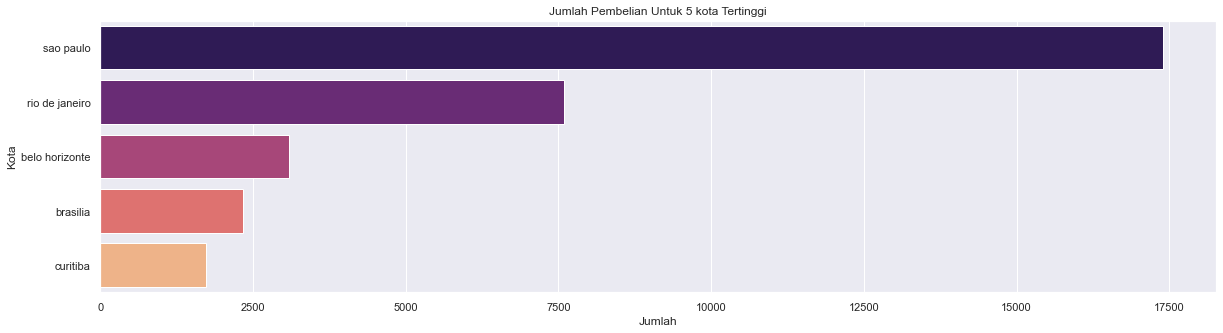

In [40]:
#plot jumlah pembelian berdasarkan kota (city)
sns.barplot(y='customer_city', x='order_id', data=df_city_big, palette='magma')
plt.title('Jumlah Pembelian Untuk 5 kota Tertinggi') #untuk memberikan judul pada plot
plt.xlabel('Jumlah') #untuk label pada sumbu x
plt.ylabel('Kota') #untuk label pada sumbu y

From the *plot* below, it can be seen that the city of Sao Paulo has the highest number of purchases while the city of Sao Bernardo do Campo has the least number of purchases.

In [41]:
#untuk melihat total jumlah pembelian untuk 5 kota tertinggi
df_city.sort_values('order_id',ascending=False)

,customer_city,order_id
0,sao paulo,17398
1,rio de janeiro,7590
2,belo horizonte,3087
3,brasilia,2341
4,curitiba,1727
...,...,...
3387,arenopolis,1
3388,terenos,1
3389,lagoa real,1
3390,araripe,1


#### f. Number of Customers Based on State

Text(0, 0.5, 'State')

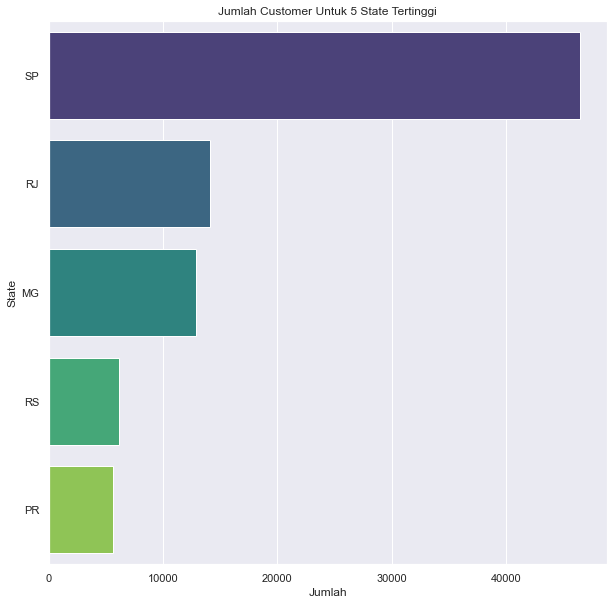

In [42]:
#plot jumlah customer berdasarkan state
sns.set(rc={'figure.figsize':(10,10)}) #untuk ukuran plot
sns.countplot(y=df['customer_state'], data=df, palette='viridis',order = df['customer_state'].value_counts().iloc[:5].index) #untuk melihat 10 state dengan jumlah customer terbanyak
plt.title('Jumlah Customer Untuk 5 State Tertinggi') #untuk memberikan judul pada plot
plt.xlabel('Jumlah') #untuk label pada sumbu x
plt.ylabel('State') #untuk label pada sumbu y

Based on the picture above, the largest number of customers come from Sao Paulo

Text(0, 0.5, 'State')

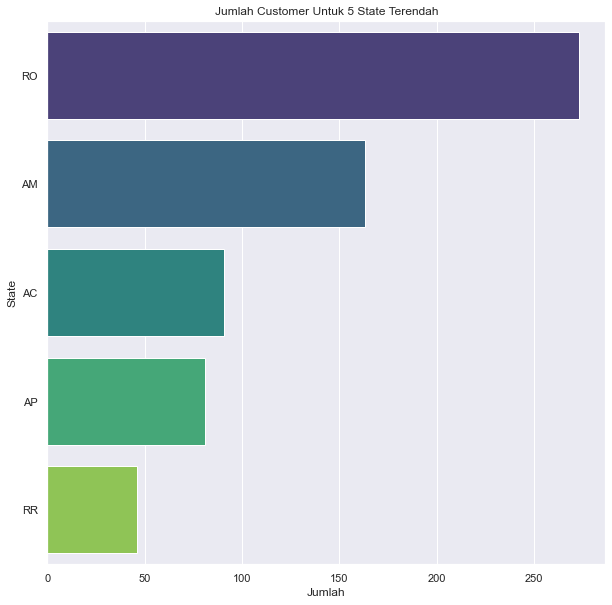

In [43]:
#plot jumlah customer berdasarkan state
sns.set(rc={'figure.figsize':(10,10)}) #untuk ukuran plot
sns.countplot(y=df['customer_state'], data=df, palette='viridis',order = df['customer_state'].value_counts().iloc[-5:].index) #untuk melihat 10 state dengan jumlah customer terbanyak
plt.title('Jumlah Customer Untuk 5 State Terendah') #untuk memberikan judul pada plot
plt.xlabel('Jumlah') #untuk label pada sumbu x
plt.ylabel('State') #untuk label pada sumbu y

Based on the picture above, the least number of *customers* comes from Roraima(RR)

In [44]:
#untuk melihat total jumlah customer untuk 5 state terendah
df['customer_state'].value_counts().iloc[-5:]

RO    273
AM    163
AC     91
AP     81
RR     46
Name: customer_state, dtype: int64

In [45]:
df['customer_state'].value_counts().iloc[:10]

SP    46435
RJ    14140
MG    12913
RS     6131
PR     5649
SC     4097
BA     3683
DF     2355
GO     2277
ES     2225
Name: customer_state, dtype: int64

### B.Economy *E-Commerce*

#### a. Trend of Total Income

Revenue is the total cost of ordering along with shipping costs.

In [46]:
df_bulan = df.groupby(by=['purchase_year', 'purchase_yearmonth'], as_index=False).agg({
    'order_id': 'count',
    'price': 'sum',
    'freight_value': 'sum'}) #untuk menghitung jumlah pembelian, total harga pembelanjaan, dan total harga pengiriman berdasarkan tahun pembelian dan tahun-bulan pembelian
df_bulan['price_per_order'] = df_bulan['price'] / df_bulan['order_id'] #untuk menghitung rata-rata harga per pembelian
df_bulan['freight_per_order'] = df_bulan['freight_value'] / df_bulan['order_id'] #untuk menghitung rata-rata harga pengiriman per pembelian
df_bulan['purchase_yearmonth']=df_bulan['purchase_yearmonth'].astype('str') #untuk mengubah type 'purchase_yearmonth' menjadi 'object'
df_bulan.head() #melihat 5 data teratas dari 'df_bulan'

,purchase_year,purchase_yearmonth,order_id,price,freight_value,price_per_order,freight_per_order
0,2016,201609,3,134.97,8.49,44.990000,2.830000
1,2016,201610,313,40325.11,6165.55,128.834217,19.698243
2,2016,201612,1,10.90,8.72,10.900000,8.720000
3,2017,201701,911,111712.47,15654.97,122.626202,17.184380
4,2017,201702,1845,232638.86,36760.79,126.091523,19.924547


Text(0, 0.5, 'Harga Pembelian')

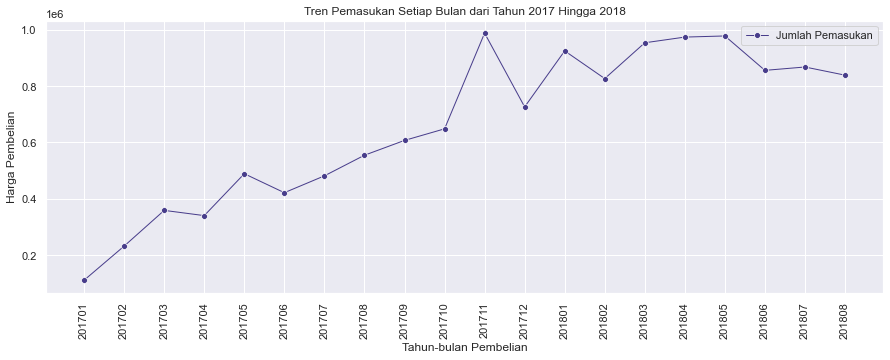

In [47]:
#plot besar pembelian setiap bulannya dari tahun 2017 sampai 2018
sns.set(rc={'figure.figsize':(15,5)}) #untuk ukuran plot
plt.xticks(rotation=90) #untuk membuat masing-masing label pada sumbu x terrotasi 90 derajat kiri
sns.lineplot(x='purchase_yearmonth', y='price', data=df_bulan[3:], linewidth=1, 
             color='darkslateblue', marker='o', label='Jumlah Pemasukan')
plt.title('Tren Pemasukan Setiap Bulan dari Tahun 2017 Hingga 2018') #untuk memberikan judul pada plot
plt.xlabel('Tahun-bulan Pembelian') #untuk label pada sumbu x
plt.ylabel('Harga Pembelian') #untuk label pada sumbu y

Overall, the trend of income has been increasing for each month although there was a significant decrease in December 2017 and income started to increase slightly in April 2018

#### b. Purchase Amount

C:\Users\agusa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Jumlah Pembelian')

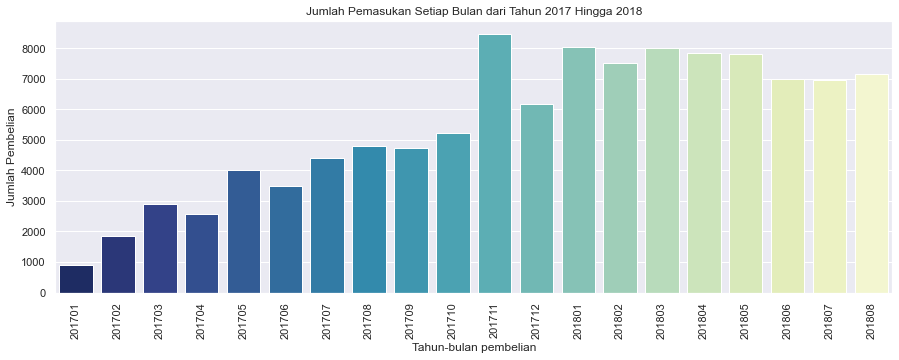

In [48]:
#bar plot untuk melihat banyak purchase setiap bulannya dari tahun 2017 hingga 2018
plt.xticks(rotation=90) #untuk membuat masing-masing label pada sumbu x terrotasi 90 derajat kiri
sns.countplot(df[df['purchase_year']!=2016]['purchase_yearmonth'], data=df, palette='YlGnBu_r') #agar penulisan label disumbu x dapat dirotasi 90 derajat
plt.title('Jumlah Pemasukan Setiap Bulan dari Tahun 2017 Hingga 2018') #untuk memberikan judul pada plot
plt.xlabel('Tahun-bulan pembelian') #untuk label pada sumbu x
plt.ylabel('Jumlah Pembelian') #untuk label pada sumbu y

From the bar plot above, it can be seen that the amount of income has increased until November 2017 even though it decreased in December 2017. Then the amount of income was evenly distributed after December 2017

#### c. Total Purchase Price Based on State

Text(0, 0.5, 'State')

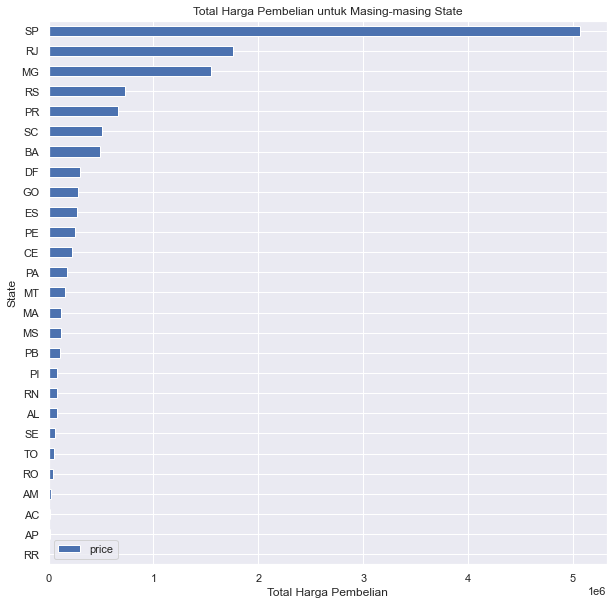

In [49]:
#bar chart untuk melihat total harga purchase berdasarkan state
sns.set(rc={'figure.figsize':(10,10)}) #ukuran plot
df.groupby('customer_state').agg({'price':'sum'}).sort_values('price').plot(kind='barh') #untuk menghitung total harga pembelian untuk masing-masing state
plt.title('Total Harga Pembelian untuk Masing-masing State') #untuk memberikan judul pada plot
plt.xlabel('Total Harga Pembelian') #untuk label pada sumbu x
plt.ylabel('State') #untuk label pada sumbu y

It can be seen that the highest total purchase price comes from *state* Sao Paulo(SP) while the lowest total purchase price comes from *state* Roraima(RR)

#### d. Average Price by State

Text(0, 0.5, 'State')

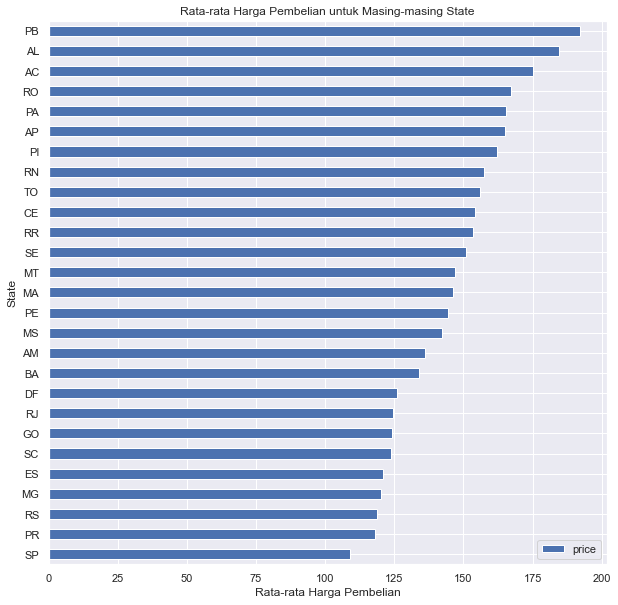

In [50]:
#bar chart untuk melihat harga produk rata-rata berdasarkan state
sns.set(rc={'figure.figsize':(10,10)}) #ukuran plot
df.groupby('customer_state').agg({'price':'mean'}).sort_values('price').plot(kind='barh') #untuk menghitung rata-rata harga pembelian masing-masing state
plt.title('Rata-rata Harga Pembelian untuk Masing-masing State') #untuk memberikan judul pada plot
plt.xlabel('Rata-rata Harga Pembelian') #untuk label pada sumbu x
plt.ylabel('State') #untuk label pada sumbu y

It can be seen that *state* Paraiba (PB) has the highest average purchase price, while *state* Sao Paulo (SP) has the lowest average purchase price

In [51]:
df.groupby('customer_state').agg({'price':'mean'}).sort_values('price',ascending=False)

,price
customer_state,
PB,192.127679
AL,184.673817
AC,175.065604
RO,167.336117
PA,165.531869
AP,165.121111
PI,161.990440
RN,157.592438
TO,156.137129


#### e. Trend of Average Shipping Prices

Text(0, 0.5, 'Rata-rata Harga Pengiriman per Pembelian')

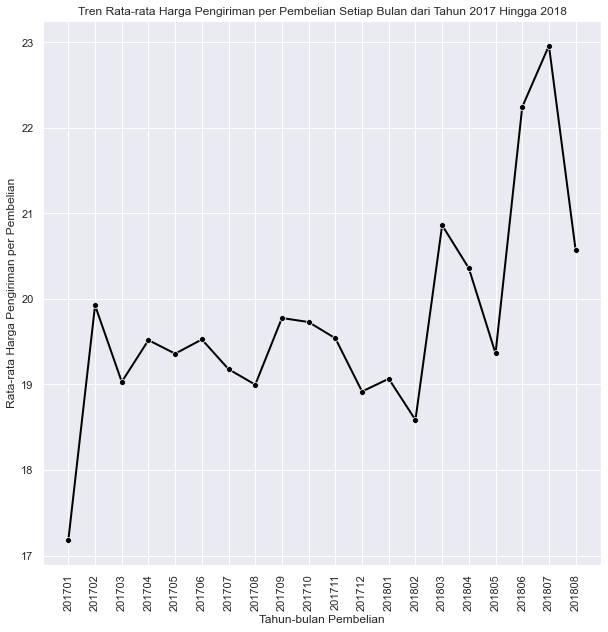

In [52]:
#line plot untuk melihat tren rata-rata harga pengirimian per pembelian setiap bulannya dari tahun 2017 hingga 2018
plt.xticks(rotation=90) #agar penulisan label disumbu x dapat dirotasi 90 derajat
sns.lineplot(x='purchase_yearmonth', y='freight_per_order', data=df_bulan[3:], linewidth=2, 
             color='black', marker='o')
plt.title('Tren Rata-rata Harga Pengiriman per Pembelian Setiap Bulan dari Tahun 2017 Hingga 2018') #untuk memberikan judul pada plot
plt.xlabel('Tahun-bulan Pembelian') #untuk label pada sumbu x
plt.ylabel('Rata-rata Harga Pengiriman per Pembelian') #untuk label pada sumbu y

From the chart above, the average trend of shipments per order has increased in February 2017 and evenly thereafter until February 2018. Then as a whole, after February 2018 there has been a large increase despite experiencing several small decreases and a large decrease in August 2018

#### f. Total Shipping Prices Based on State

Text(0, 0.5, 'State')

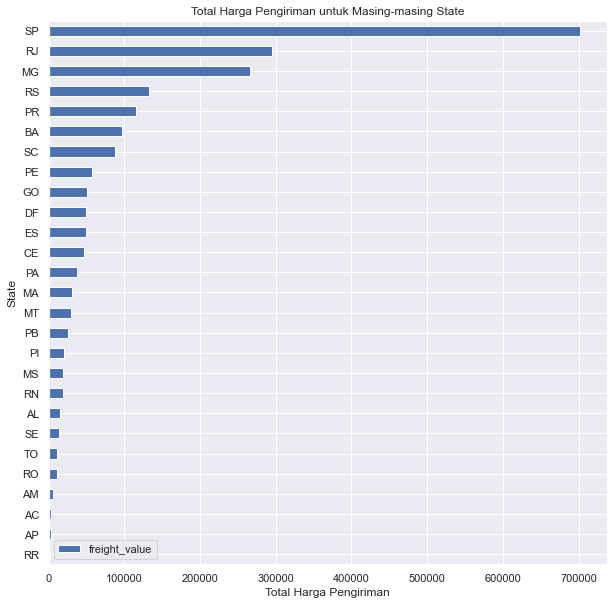

In [53]:
#bar chart untuk melihat total harga pengiriman berdasarkan state
sns.set(rc={'figure.figsize':(10,10)}) #ukuran plot
df.groupby('customer_state').agg({'freight_value':'sum'}).sort_values('freight_value').plot(kind='barh') #untuk menghitung total harga pengiriman untuk maisng-masing state
plt.title('Total Harga Pengiriman untuk Masing-masing State') #untuk memberikan judul pada plot
plt.xlabel('Total Harga Pengiriman') #untuk label pada sumbu x
plt.ylabel('State') #untuk label pada sumbu y

The largest total shipping price is shipping to Sao Paulo(SP), while the lowest is to Roraima(RR)

In [54]:
#untuk melihat total harga pengiriman pada setiap state mulai dari yang terendah hingga ke tertinggi
df.groupby('customer_state').agg({'freight_value':'sum'}).sort_values('freight_value')

,freight_value
customer_state,
RR,1982.05
AP,2767.00
AC,3644.36
AM,5429.63
RO,11283.24
TO,11604.86
SE,13714.94
AL,15316.77
RN,18609.12


#### h.Delivery Analysis

In [55]:
purchasing = df['order_purchase_timestamp']
delivered = df['order_delivered_customer_date']
estimated = df['order_estimated_delivery_date']
df['time_to_delivery'] = delivered - purchasing #untuk menghitung lama waktu pengiriman barang
df['diff_estimated_delivery'] = delivered - estimated #untuk menghitung perbedaan sampainya pengiriman barang dari waktu yang diestimasi

In [56]:
df['time_to_delivery'] = df['time_to_delivery'].apply(lambda x: x/ np.timedelta64(1, 'h')) #untuk mengubah format dari 'time_to_delivery' ke dalam jam
df['diff_estimated_delivery'] = df['diff_estimated_delivery'].apply(lambda x: x/ np.timedelta64(1, 'h')) #untuk mengubah format dari 'diff_estimated_delivery' ke dalam jam

In [57]:
df_state = df.groupby(by='customer_state', as_index=False).mean() #untuk menghitung rata-rata setiap variabel numerik dari data berdasarkan state
state_freight= df_state.loc[:, ['customer_state', 'freight_value']].sort_values(by='freight_value', ascending=False) #untuk mengurutkan state berdasarkan harga pengiriman
state_time_to_delivery = df_state.loc[:, ['customer_state', 'time_to_delivery']].sort_values(by='time_to_delivery', ascending=False) #untuk mengurutkan state berdasarkan lama waktu pengiriman barang 
state_estimated_delivery = df_state.loc[:, ['customer_state', 'diff_estimated_delivery']].sort_values(by='diff_estimated_delivery') #untuk mengurutkan state berdasarkan perbedaan sampainya pengiriman barang dari waktu yang diestimasi

In [58]:
#untuk melihat perbedaan sampainya pengiriman barang dari waktu yang diestimasi
state_estimated_delivery

,customer_state,diff_estimated_delivery
0,AC,-487.988181
20,RO,-464.186358
2,AM,-461.424899
3,AP,-426.441255
21,RR,-422.841002
12,MT,-333.504799
13,PA,-325.664633
22,RS,-322.324935
19,RN,-318.399827
17,PR,-307.008811


Because all *states* have different *delivery* times and estimates are negative, meaning that **delivery to all *states* arrives earlier than the estimated estimated time**

In [59]:
#Akan dimutlakkan selisih dari perbedaan waktu delivery dan estimasi, yaitu kolom 'diff_estimated_delivery'
state_estimated_delivery['diff_estimated_delivery']=state_estimated_delivery['diff_estimated_delivery'].abs()
state_estimated_delivery #akan dicetak untuk dilihat hasil mutlaknya

,customer_state,diff_estimated_delivery
0,AC,487.988181
20,RO,464.186358
2,AM,461.424899
3,AP,426.441255
21,RR,422.841002
12,MT,333.504799
13,PA,325.664633
22,RS,322.324935
19,RN,318.399827
17,PR,307.008811


Text(0, 0.5, 'State')

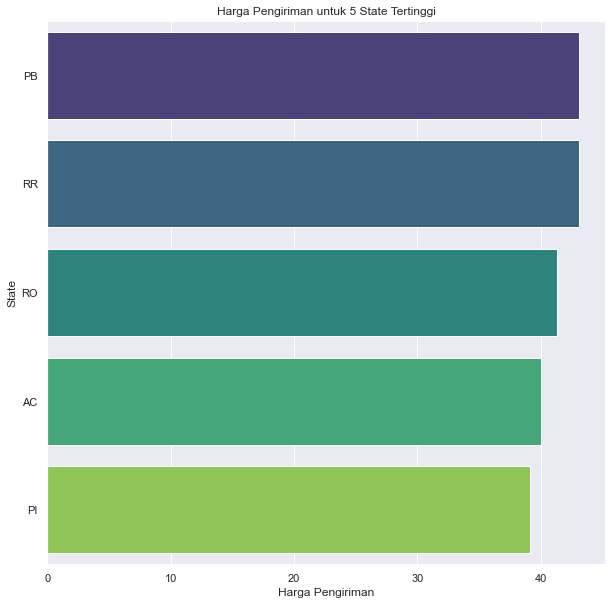

In [60]:
#untuk melihat 5 state yang memiliki harga pengiriman tertinggi
sns.barplot(x='freight_value', y='customer_state', data=state_freight.head(), palette='viridis')
plt.title('Harga Pengiriman untuk 5 State Tertinggi') #untuk memberikan judul pada plot
plt.xlabel('Harga Pengiriman') #untuk label pada sumbu x
plt.ylabel('State') #untuk label pada sumbu y

It can be seen that the highest shipping price is the shipping price to Paraiba(PB)

In [61]:
#untuk melihat harga pengiriman untuk 5 state tertinggi
state_freight[['customer_state','freight_value']].sort_values('freight_value',ascending=False)[:5]

,customer_state,freight_value
14,PB,43.091689
21,RR,43.088043
20,RO,41.330549
0,AC,40.047912
16,PI,39.115086


Text(0, 0.5, 'State')

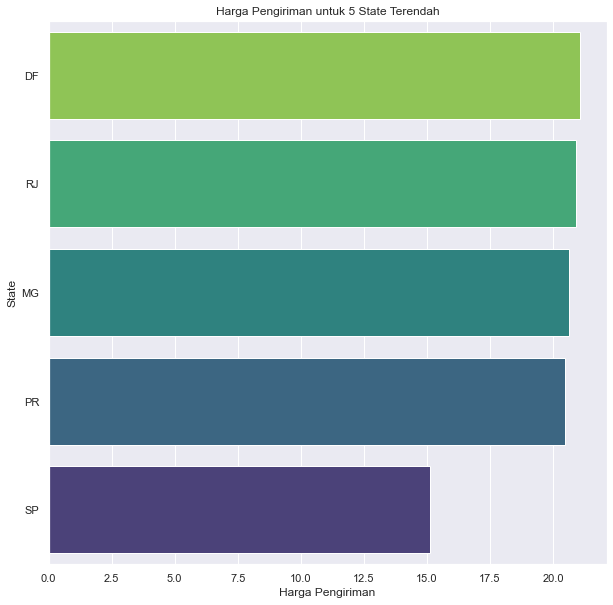

In [62]:
#untuk melihat 5 state terendah yang memiliki harga pengiriman terendah
sns.barplot(x='freight_value', y='customer_state', data=state_freight.tail(), palette='viridis_r')
plt.title('Harga Pengiriman untuk 5 State Terendah') #untuk memberikan judul pada plot
plt.xlabel('Harga Pengiriman') #untuk label pada sumbu x
plt.ylabel('State') #untuk label pada sumbu y

While the lowest shipping price is the shipping price to Sao Paulo(SP)

In [63]:
#untuk melihat harga pengiriman untuk 5 state terendah
state_freight[['customer_state','freight_value']].sort_values('freight_value',ascending=False).tail()

,customer_state,freight_value
6,DF,21.072161
18,RJ,20.912704
10,MG,20.627192
17,PR,20.471816
25,SP,15.114601


Text(0, 0.5, 'State')

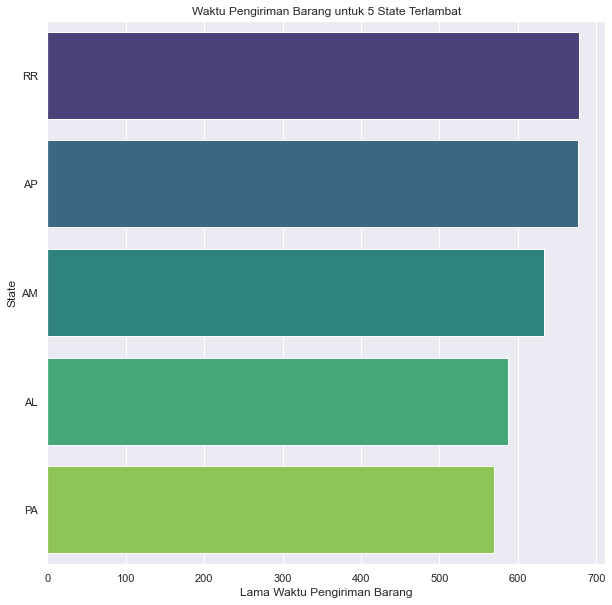

In [64]:
#untuk melihat 5 state terendah yang memiliki lama waktu pengiriman barang terlama
sns.barplot(x='time_to_delivery', y='customer_state', data=state_time_to_delivery.head(), palette='viridis')
plt.title('Waktu Pengiriman Barang untuk 5 State Terlambat') #untuk memberikan judul pada plot
plt.xlabel('Lama Waktu Pengiriman Barang') #untuk label pada sumbu x
plt.ylabel('State') #untuk label pada sumbu y

In [65]:
#untuk melihat waktu pengiriman untuk 5 state terlambat (dalam jam)
state_time_to_delivery[['customer_state','time_to_delivery']].sort_values('time_to_delivery',ascending=False).head()

,customer_state,time_to_delivery
21,RR,677.544275
3,AP,676.943035
2,AM,633.383212
1,AL,587.739403
13,PA,570.097281


Text(0, 0.5, 'State')

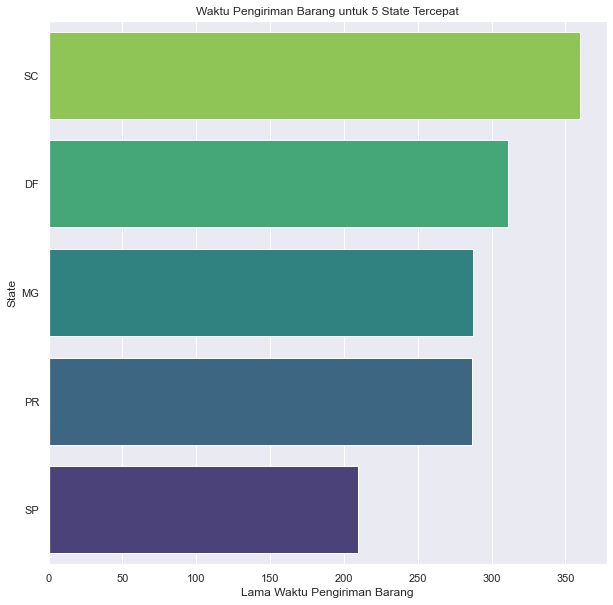

In [66]:
#untuk melihat 5 state tertinggi yang memiliki lama waktu pengiriman barang terlama
sns.barplot(x='time_to_delivery', y='customer_state', data=state_time_to_delivery.tail(), palette='viridis_r')
plt.title('Waktu Pengiriman Barang untuk 5 State Tercepat') #untuk memberikan judul pada plot
plt.xlabel('Lama Waktu Pengiriman Barang') #untuk label pada sumbu x
plt.ylabel('State') #untuk label pada sumbu y

Meanwhile *state* Sao Paulo(SP) has the fastest delivery time

In [67]:
#to see the delivery time for the 5 fastest states (in hours)
state_time_to_delivery[['customer_state','time_to_delivery']].sort_values('time_to_delivery',ascending=False).tail()

,customer_state,time_to_delivery
23,SC,359.943437
6,DF,311.015835
10,MG,287.556996
17,PR,286.733214
25,SP,209.343141


Text(0, 0.5, 'State')

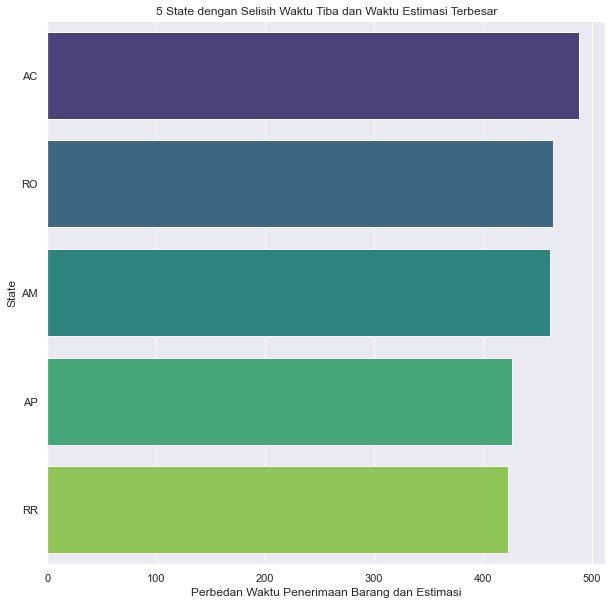

In [68]:
#to see the 5 states with the largest difference in arrival time and estimated time
sns.barplot(x='diff_estimated_delivery', y='customer_state', data=state_estimated_delivery.head(), palette='viridis')
plt.title('5 State dengan Selisih Waktu Tiba dan Waktu Estimasi Terbesar') #untuk memberikan judul pada plot
plt.xlabel('Perbedan Waktu Penerimaan Barang dan Estimasi') #untuk label pada sumbu x
plt.ylabel('State') #untuk label pada sumbu y

Dapat dilihat bahwa terdapat pengiriman ke *state* Acre(AC) yang memiliki waktu pengiriman tercepat yang lebih cepat dari waktu estimasinya

In [69]:
#untuk melihat selisih waktu tiba dan waktu estimasi terbesar untuk 5 state terbesar
state_estimated_delivery[['customer_state','diff_estimated_delivery']].sort_values('diff_estimated_delivery',ascending=False).head()

,customer_state,diff_estimated_delivery
0,AC,487.988181
20,RO,464.186358
2,AM,461.424899
3,AP,426.441255
21,RR,422.841002


Text(0, 0.5, 'State')

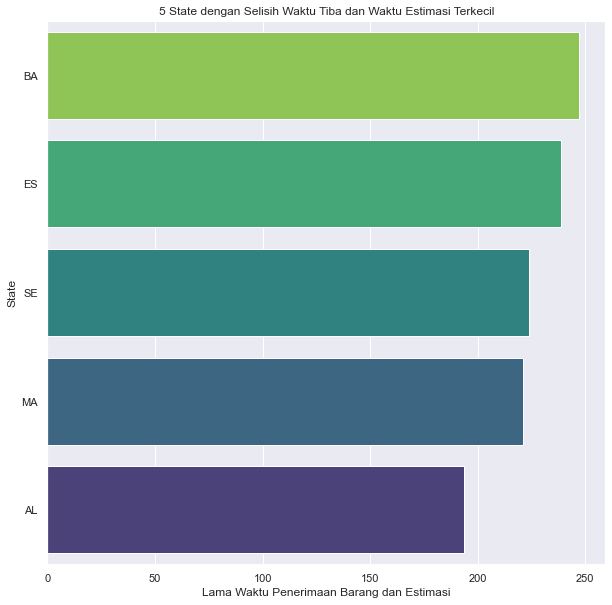

In [70]:
#untuk melihat 5 state dengan selisih waktu tiba dan waktu estimasi terkecil
sns.barplot(x='diff_estimated_delivery', y='customer_state', data=state_estimated_delivery.tail(), palette='viridis_r')
plt.title('5 State dengan Selisih Waktu Tiba dan Waktu Estimasi Terkecil') #untuk memberikan judul pada plot
plt.xlabel('Lama Waktu Penerimaan Barang dan Estimasi') #untuk label pada sumbu x
plt.ylabel('State') #untuk label pada sumbu y

In *state* Alagoas(AL) there is a late delivery time that is faster than the estimated time

In [71]:
#untuk melihat selisih waktu tiba dan waktu estimasi untuk 5 state terkecil
state_estimated_delivery[['customer_state','diff_estimated_delivery']].sort_values('diff_estimated_delivery',ascending=False).tail()

,customer_state,diff_estimated_delivery
4,BA,246.925482
7,ES,238.781078
24,SE,223.817613
9,MA,220.860777
1,AL,193.376353


# III. Methodology (Machine Learning):
In this section, we will create a model that can perform *customer segmentation*. *Customer segmentation* itself is an *unsupervised* problem so that our data does not have a label, but later we ourselves will provide a label. Algorithm that can be used:
- RFM Sementation
- K-Means
- Agglomerative Clustering

## Data (Machine Learning):
- Unit Analysis:
  - Customer behavior: Customer Unique ID

- Features:
  - Recency: Measures the last time a customer made a transaction.

  - Frequency: Measures how often a customer makes a transaction.

  - Monetary: Measures the total transactions made by a customer.

## RFM Segmentation 
RFM stands for *Recency, Frequency* and *Monetary*. Each factor adjusts to the characteristics of *customer*. This RFM metric is an important indicator of *customer* behavior segmentation because *frequency* and *monetary* affect *customer lifetime value*, and *recency* affects *engagement rate.*

The *RFM Analysis* application on this data aims to segment *customers*, so that e-commerce can apply sales/marketing strategies that suit the characteristics of these *customers*.

## 1. Persiapan Dataset

Because what is analyzed is *customer* characteristics, the previous data is grouped based on *customer*. 


In [118]:
import pandas as pd
from datetime import datetime, timedelta

# Modeling
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Evaluation
from sklearn.metrics import silhouette_score

#Scaling
from sklearn.preprocessing import StandardScaler

# Regular Expression
import re

# Warnings
import warnings
warnings.filterwarnings('ignore')


In [73]:
df1 = pd.merge(df,or_pay,on='order_id',how='left') 
df1.head()

,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,...,purchase_yearmonth,purchase_dayofweek,purchase_period,month_num,time_to_delivery,diff_estimated_delivery,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,...,201710,Mon,Morning,10,202.477778,-170.579722,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,...,201710,Mon,Morning,10,202.477778,-170.579722,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,...,201710,Mon,Morning,10,202.477778,-170.579722,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,...,201807,Tue,Night,7,330.768889,-128.537500,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1.0,...,201808,Wed,Morning,8,225.461111,-413.891944,1.0,credit_card,3.0,179.12


In [74]:
df1 = df1.drop(['payment_installments', 'payment_sequential'], axis = 1)

In [75]:
# Recency
now = datetime.now()
df1['order_purchase_timestamp'] = pd.to_datetime(df1['order_purchase_timestamp'])
df1['recency'] = (now - df1['order_purchase_timestamp']).dt.days

# Frequency
data_frequency = df1.groupby('order_item_id').order_purchase_timestamp.count()
data_frequency = data_frequency.reset_index()
data_frequency.columns = ['order_item_id','frequency']
df1 = df1.merge(data_frequency, on='order_item_id')

# Monetary
data_monetary = df1.groupby('order_item_id').payment_value.sum()
data_monetary = data_monetary.reset_index()
data_monetary.columns = ['order_item_id','monetary']
df1 = df1.merge(data_monetary, on='order_item_id')



In [76]:
df1.columns

Index(['order_id', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'price',
       'freight_value', 'purchase_year', 'purchase_month',
       'purchase_yearmonth', 'purchase_dayofweek', 'purchase_period',
       'month_num', 'time_to_delivery', 'diff_estimated_delivery',
       'payment_type', 'payment_value', 'recency', 'frequency', 'monetary'],
      dtype='object')

In [77]:
# Group data by customer_unique_id
rfm = df1.groupby(['customer_unique_id']).agg({
    'order_purchase_timestamp': lambda x: (df1['order_purchase_timestamp'].max() - x.max()).days,
    'order_id': 'count',
    'price': 'sum'
})

In [78]:
# Rename columns
rfm.rename(columns={'order_purchase_timestamp': 'recency',
                   'order_id': 'frequency',
                   'price': 'monetary'}, inplace=True)


In [79]:
# Assign score
rfm['recency_score'] = pd.qcut(rfm['recency'], q=4, labels=list(range(4, 0, -1)))
rfm['frequency_score'] = pd.qcut(rfm['frequency'], q=4, labels=list(range(4, 5)), duplicates='drop')
rfm['monetary_score'] = pd.qcut(rfm['monetary'], q=4, labels=list(range(1, 5)), duplicates='drop')

# Create RFM_Score
rfm['RFM_Score'] = rfm[['recency_score', 'frequency_score', 'monetary_score']].sum(axis=1)


In [80]:
# For most use cases, people usually look at one year data
rfm = rfm[rfm['recency'] <= 365]

In [81]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72759 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffff5962728ec6157033ef9805bacc48
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   recency          72759 non-null  int64   
 1   frequency        72759 non-null  int64   
 2   monetary         72759 non-null  float64 
 3   recency_score    72759 non-null  category
 4   frequency_score  72759 non-null  category
 5   monetary_score   72759 non-null  category
 6   RFM_Score        72759 non-null  int64   
dtypes: category(3), float64(1), int64(3)
memory usage: 3.0+ MB


## We'll do 5x5x5 RFM analysis

In [82]:
# Get the sense of the distribution
rfm.quantile([.2, .4, .6, .8]).to_dict()

{'recency': {0.2: 70.0, 0.4: 138.0, 0.6: 204.0, 0.8: 275.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 39.99,
  0.4: 69.9,
  0.6: 113.97999999999999,
  0.8: 185.12400000000008},
 'RFM_Score': {0.2: 8.0, 0.4: 9.0, 0.6: 10.0, 0.8: 11.0}}

#### For the convenience of marketers, we can choose the grouping method as follows:
Untuk kenyamanan pemasar, kita dapat memilih metode pengelompokan sebagai berikut

- Recency:

|  Days  | R-score |
|:------:|:-------:|
| 0-14   |    5    |
| 15-30  |    4    |
| 31-60  |    3    |
| 60-180 |    2    |
| > 180  |    1    |

- Frequency

|Frequency| F-score |
|:-------:|:-------:|
|  > 6    |    5    |
|  5 - 6  |    4    |
|  3 - 4  |    3    |
|    2    |    2    |
|    1    |    1    |


- Monetary

| Monetary   | M-score |
|:----------:|:-------:|
|   >2000    |    5    |
| (1000-2000]|    4    |
| (500-1000] |    3    |
| (250-500]  |    2    |
| (0, 250]   |    1    |


In [83]:
def r_score(x):
    if x <= 14:
        return 5
    elif x <= 30:
        return 4
    elif x <= 60:
        return 3
    elif x <= 180:
        return 2
    else:
        return 1

def f_score(x):
    if x <= 1:
        return 1
    elif x <= 2:
        return 2
    elif x <= 4:
        return 3
    elif x <= 6:
        return 4
    else:
        return 5

def m_score(x):
    if x <= 250:
        return 1
    elif x <= 500:
        return 2
    elif x <= 1000:
        return 3
    elif x <= 2000:
        return 4
    else:
        return 5   

In [84]:
rfm['R_score'] = rfm['recency'].apply(r_score)
rfm['F_score'] = rfm['frequency'].apply(f_score)
rfm['M_score'] = rfm['monetary'].apply(m_score)
rfm['RFM_score'] = rfm['R_score'] * 100 + rfm['F_score'] * 10 + rfm['M_score']

In [85]:
# Take a peak of our RFM table by CustomerID
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_Score,R_score,F_score,M_score,RFM_score
customer_unique_id,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90,4,4,3,11,2,1,1,211
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,3,4,1,8,2,1,1,211
0000f6ccb0745a6a4b88665a16c9f078,320,1,25.99,2,4,1,7,1,1,1,111
0004aac84e0df4da2b147fca70cf8255,287,1,180.00,2,4,4,10,1,1,1,111
0004bd2a26a76fe21f786e4fbd80607f,145,1,154.00,3,4,3,10,2,1,1,211


In [86]:
# Convert the RFM_score into string
rfm['RFM_score'] = rfm['RFM_score'].astype('str')

In [87]:
# F-R plot: Count the number of users in each F-R pair.
rfm_count = pd.pivot_table(rfm, values='RFM_score', index= ['F_score'],
                    columns=['R_score'], aggfunc='size', fill_value=0)
rfm_count

R_score,1,2,3,4,5
F_score,,,,,
1,29189,21808,4773,3824,2235
2,3875,2904,596,443,250
3,1066,800,154,133,60
4,208,187,28,26,19
5,75,80,14,7,5


In [88]:
# F-R plot: Find the monetary median of users in each F-R pair.
rfm_median = pd.pivot_table(rfm, values='monetary', index= ['F_score'],
                    columns=['R_score'], aggfunc='median', fill_value=0).round(2)
rfm_median

R_score,1,2,3,4,5
F_score,,,,,
1,79.99,84.99,79.90,79.90,72.99
2,139.80,139.80,139.80,142.44,124.89
3,190.70,191.83,205.11,209.97,161.45
4,274.04,334.50,239.75,259.43,360.53
5,814.17,562.95,556.19,1138.30,699.60


In [89]:
# F-R plot: Find the monetary mean of users in each F-R pair.
rfm_mean = pd.pivot_table(rfm, values='monetary', index= ['F_score'],
                    columns=['R_score'], aggfunc='mean', fill_value=0).round(2)
rfm_mean

R_score,1,2,3,4,5
F_score,,,,,
1,128.10,134.71,132.94,129.17,122.35
2,209.98,202.13,211.52,206.21,210.13
3,277.39,285.24,346.41,297.59,212.62
4,410.60,479.38,414.55,459.64,336.53
5,1152.61,996.37,874.74,1328.27,637.42


In [90]:
# F-R plot: Find the monetary sum of users in each F-R pair.
rfm_sum = pd.pivot_table(rfm, values='monetary', index= ['F_score'],
                    columns=['R_score'], aggfunc='sum', fill_value=0).round(0).astype(int)
rfm_sum

R_score,1,2,3,4,5
F_score,,,,,
1,3739223,2937785,634538,493936,273444
2,813690,586989,126064,91352,52533
3,295697,228190,53347,39579,12757
4,85405,89644,11607,11951,6394
5,86446,79709,12246,9298,3187


In [91]:
# See the RFM scores, and monetary metrics from all 5x5x5 RFM groups
rfm_agg = rfm.groupby('RFM_score').agg({'RFM_score':'size', 'monetary': ['sum', 'mean','median']}).round(2).astype(int)
rfm_agg

RFM_score monetary             
               size      sum  mean median
RFM_score                                
111           26362  2260381    85     69
112            1874   635510   339    325
113             698   476079   682    649
114             237   320771  1353   1299
115              18    46480  2582   2400
...             ...      ...   ...    ...
541               7      865   123    143
542               8     3115   389    407
543               4     2413   603    600
551               1      186   186    186
553               4     3000   750    707

[112 rows x 4 columns]

In [92]:
def heatmap(data, ax = None):
    
    # A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  
    # If not provided, use current axes or create a new one.
    if not ax:
        ax = plt.gca()
        
    im = ax.imshow(data, cmap="YlGn")
    
    # Show all ticks
    ax.set_xticks(np.arange(5))
    ax.set_yticks(np.arange(5))
    # label all ticks with the respective list entries
    ax.set_xticklabels(data.columns)
    ax.set_yticklabels(data.index)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Normalize the threshold to the images color range.
    threshold = im.norm(data.max().max())/2.
    textcolors=("black", "white")

    # Loop over data dimensions and create text annotations.
    for i in range(5):
        for j in range(5):
            text = ax.text(j, i, data.iloc[i, j],
                           ha="center", va="center", color=textcolors[int(im.norm(data.iloc[i, j]) > threshold)])

    # ax.set_title("RFM Customer Group Counts")
    plt.xlabel("R Score")
    plt.ylabel("F Score")
    
    return im

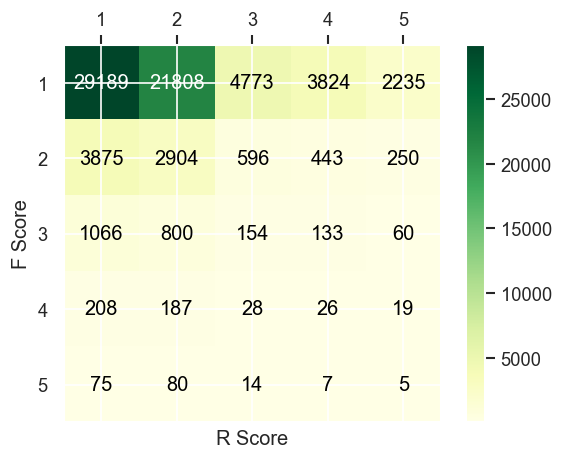

In [93]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=120)
heatmap(rfm_count, ax = ax)
fig.tight_layout()
plt.show()

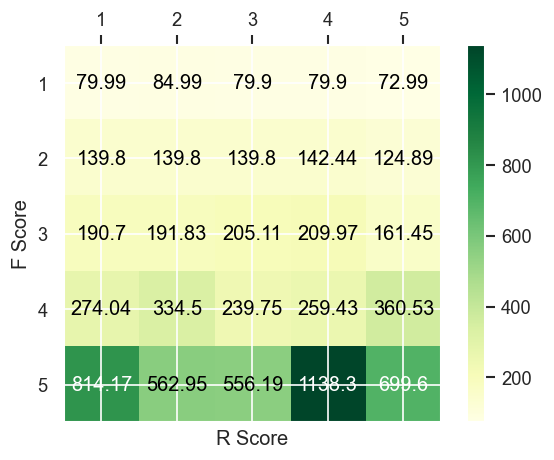

In [94]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=120)
heatmap(rfm_median, ax = ax)
fig.tight_layout()
plt.show()

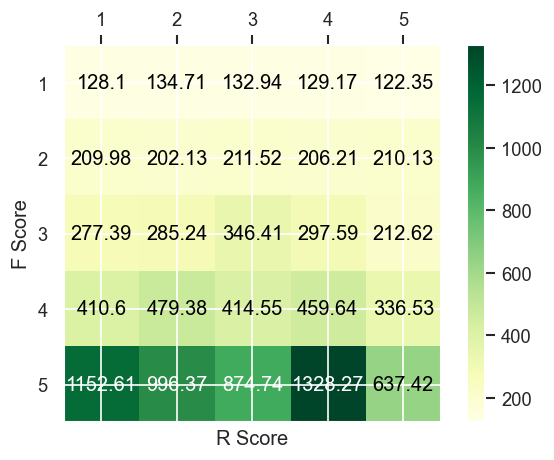

In [95]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=120)
heatmap(rfm_mean, ax = ax)
fig.tight_layout()
plt.show()

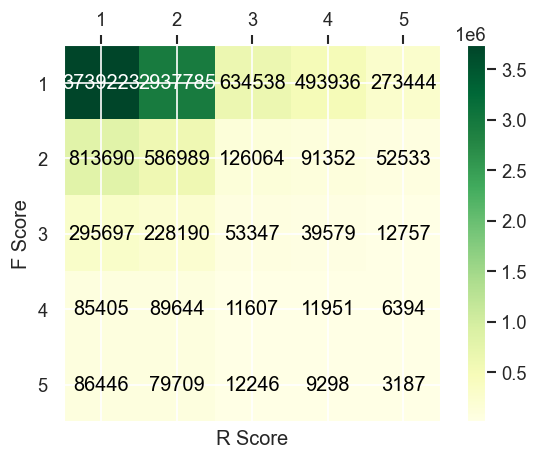

In [96]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=120)
heatmap(rfm_sum, ax = ax)
fig.tight_layout()
plt.show()

### Short Summary:
1. High-frequency buyers (especially F-score = 5, frequency > 6/year) contribute the most to the company.
2. High frequency and most recent buyers (high F and R scores) are the ones we should definitely keep.
3. Medium Frequency (F-score = 3) are the groups we want to save (give incentives), especially for those ones who have R-score > 2.
4. The number of new customers is quite low, so the company should lunch some customer acquisition campaigns.
5. There are quite some low frequency and low recency score buyers, which means the customers may lose interest in the website or products. The company should dive deep to investigate and save this group because new customer acquisitions are expensive.

### Ringkasan Singkat:
1. Pembeli dengan frekuensi tinggi (terutama F-score = 5, frekuensi > 6/tahun) berkontribusi paling besar bagi perusahaan.
2. Frekuensi tinggi dan pembeli terbaru (skor F dan R tinggi) adalah yang harus kami pertahankan.
3. Frekuensi Sedang (F-score = 3) adalah kelompok yang ingin kita hemat (berikan insentif), terutama yang memiliki R-score > 2.
4. Jumlah pelanggan baru cukup rendah, sehingga perusahaan harus melakukan beberapa kampanye akuisisi pelanggan.
5. Ada cukup banyak pembeli frekuensi rendah dan skor kebaruan rendah, yang berarti pelanggan mungkin kehilangan minat pada situs web atau produk. Perusahaan harus menyelam lebih dalam untuk menyelidiki dan menyelamatkan grup ini karena akuisisi pelanggan baru itu mahal.

### Assign Customer Segmentation based on RFM Scores

It might not be practical to work on 5x5x5 = 125 RFM group individually. Some groups are too small, so it is hard for marketers to work on too many groups. 
Therefore, we combine some of the groups based on their RFM properties. We further assign customer segmentation for marketing purposes to give the marketers a clear goal to work on.


#### Segment Description
- **VIPs**: For those whose recent purchases are within 180 days and have bought more than 5 times in a year.
- **Potential loyalists**: For those whose recent purchases are within 180 days and have bought 3-4 times in a year.
- **Need to focus**: For those who have bought only 2 times in the past year.
- **Good old friends**: For those who have bought more than 3 times didn't purchase within 180 days.
- **New customers**: For those who have only purchased once and their recent purchase is less than 30 days.
- **Hibernating**: For those who have only purchased once, and their recent purchase has been more than 30 days.

#### Actions
- **VIPs**: Keep them happy (at any cost).
- **Potential loyalists**: Should give incentives to increase their tendency to buy more times on the website.
- **Need to focus**: They have moderate monetary contributions, but the marketer should turn them in the potential groups ASAP; otherwise, they may turn to hibernate.
- **Good old friends**: They were loyal, but it seems we are losing them. Give them incentives to recall their good memories (recommendation comes in because we have their purchase history) and make them have a recent purchase.
- **New customers**: Make them want to purchase the second time; otherwise, they'll go hibernating.
- **Hibernating**: We don't know them much, and they didn't purchase within a month. We need to guess to motivate them to buy another time. 


#### RFM Group
- **VIPs**: 25x, 35x, 45x, 55x, 24x, 34x, 44x, 54x, where x = 1...5
- **Potential loyalists**: 23x, 33x, 43x, 53x, where x = 1...5
- **Need to focus**: 12x, 22x, 32x, 42x, 52x, where x = 1...5
- **Good old frends**: 13x, 14x, 15x, where x = 1...5
- **New customers**: 41x, 51x, where x = 1...5 
- **Hibernating**: 11x, 21x, 31x, where x = 1...5


### Let's see how it becomes after we reduced segments from 5x5x5 RFM groups down to 6 marketing gruops

In [97]:
segmentation = {
    r'[2-5][4-5]': 'VIPs',
    r'[2-5]3': 'Potential loyalists',
    r'[1-5]2': 'Need to focus',
    r'1[3-5]': 'Good old frends',
    r'[4-5]1': 'New customers',
    r'[1-3]1': 'Hibernating',
}

In [98]:
rfm['Segment'] = rfm['R_score'] * 10 + rfm['F_score']
rfm['Segment'] = rfm['Segment'].astype(str)

In [99]:
rfm['Segment'] = rfm['Segment'].replace(segmentation, regex=True)
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_Score,R_score,F_score,M_score,RFM_score,Segment
customer_unique_id,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90,4,4,3,11,2,1,1,211,Hibernating
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,3,4,1,8,2,1,1,211,Hibernating
0000f6ccb0745a6a4b88665a16c9f078,320,1,25.99,2,4,1,7,1,1,1,111,Hibernating
0004aac84e0df4da2b147fca70cf8255,287,1,180.00,2,4,4,10,1,1,1,111,Hibernating
0004bd2a26a76fe21f786e4fbd80607f,145,1,154.00,3,4,3,10,2,1,1,211,Hibernating


In [100]:
rfm_segment = rfm.groupby('Segment').agg({'recency': ['mean', 'median'], 
                                          'frequency': ['mean', 'median'], 
                                          'monetary': ['mean', 'median', 'sum', 'count']}).round(0).astype(int)
rfm_segment

recency        frequency        monetary                  \
                       mean median      mean median     mean median      sum   
Segment                                                                        
Good old frends         268    273         4      3      347    216   467548   
Hibernating             189    187         1      1      131     81  7311547   
Need to focus           175    174         2      2      207    140  1670627   
New customers            18     18         1      1      127     79   767380   
Potential loyalists      93     97         3      3      291    195   333873   
VIPs                     95    101         7      6      612    400   224037   

                            
                     count  
Segment                     
Good old frends       1349  
Hibernating          55770  
Need to focus         8068  
New customers         6059  
Potential loyalists   1147  
VIPs                   366

In [101]:
segment_counts = rfm_segment['monetary']['count'].sort_values(ascending = True)
segment_counts

Segment
VIPs                     366
Potential loyalists     1147
Good old frends         1349
New customers           6059
Need to focus           8068
Hibernating            55770
Name: count, dtype: int32

In [102]:
segment_monetary_sum = rfm_segment['monetary']['sum'].sort_values(ascending = True)
segment_monetary_sum

Segment
VIPs                    224037
Potential loyalists     333873
Good old frends         467548
New customers           767380
Need to focus          1670627
Hibernating            7311547
Name: sum, dtype: int32

In [103]:
def hbar(data):
    
    num_of_segment = len(data)
    
    ax.set_frame_on(False)
    ax.set_yticks(range(num_of_segment))
    ax.set_yticklabels(data.index)

    bars = ax.barh(range(num_of_segment), data, color='silver')

    for i, bar in enumerate(bars):
            value = bar.get_width()
            if data.index[i] in ['VIPs']:
                bar.set_color('firebrick')
            ax.text(value,
                    bar.get_y() + bar.get_height()/2,
                    '{:,} ({:}%)'.format(int(value),int(value*100/data.sum())),
                    va='center',
                    ha='left')

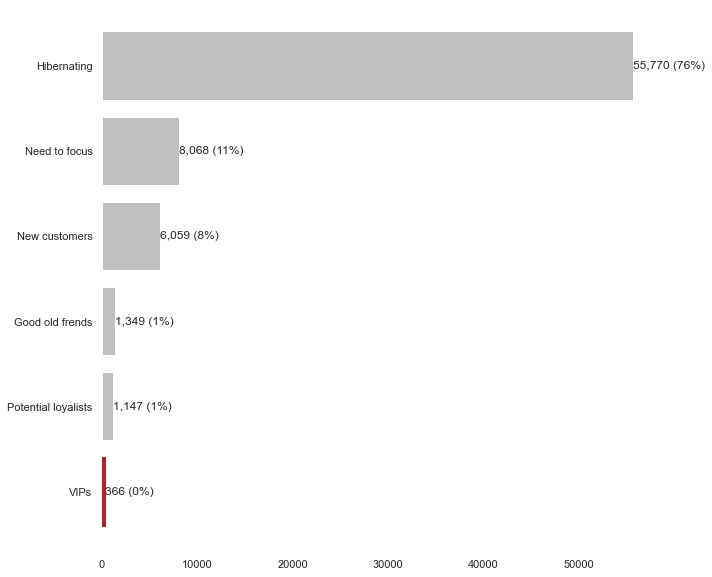

In [104]:
fig, ax = plt.subplots()
hbar(segment_counts)
plt.show()

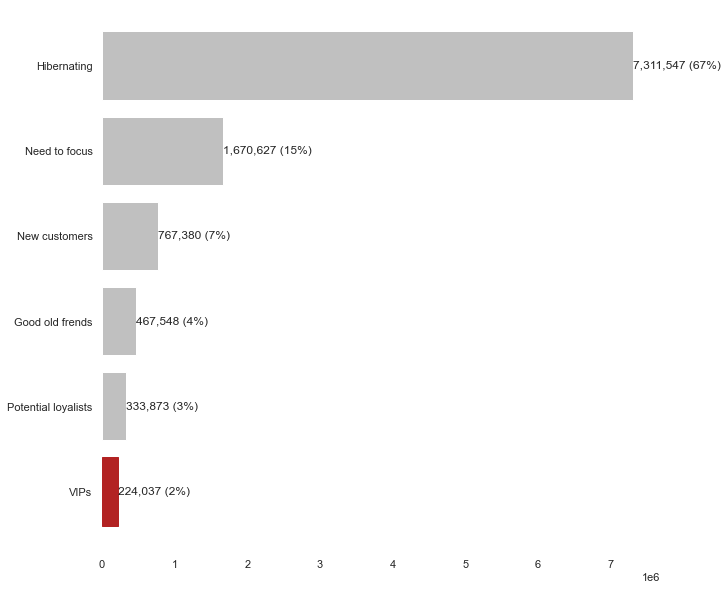

In [105]:
fig, ax = plt.subplots()
hbar(segment_monetary_sum)
plt.show()

#### Short Summary:
- VIPs are the champian, which contributes the most, but it only contributes 2% of our total customers.
- Hibernating group has a lot of people (67%). Although they didn't make any recent purchase within 180 days, it accumulated moderate income. However, since we don't know them much, it's better to investigate why they only purchased once and left.
- We don't see many new customers joining in (7%), so the customer base is relatively stable.
- It's good to see we don't have too many people in the "Good old friends" group, which means those who purchased more than three times tend to stay and keep buying within 180 days cycle.


#### Calucalate Silhoutte Score

In [111]:
# Define x
x = rfm[['recency', 'frequency', 'monetary']]
# Scale
scaler = StandardScaler()
# Data Scale
x_scaled = scaler.fit_transform(x)
# Calculate Silhoutte Score
labels = rfm['RFM_Score']
silhoutte_value = silhouette_score(x_scaled, labels)
print('Silhoutte Score for RFM:', silhoutte_value)

Silhoutte Score for RFM: -0.11443209777837651


## K-Means:
K-Means is an algorithm that can be used for *clustering*. The K-Means algorithm uses the same distance concept as the KNN algorithm. One of the distance concepts used is *Euclidean*. Because the K-Means algorithm uses the concept of distance, we have to *scaling* the *feature* that we have because the *feature* is *scaling* not the same. The *feature* that we have indicates an *outlier* and we don't want the *outlier* data to have any effect, so the scaling that can be used is *Standard Scaler*.

In [116]:
# Scale
scaler = StandardScaler()

# Data Scale
x_scaled = scaler.fit_transform(x)

In [119]:
score = []
number_of_clusters = range(2,9)

for i in number_of_clusters:
  kmeans = KMeans(i)
  kmeans.fit(x_scaled)

  label = kmeans.labels_
  score.append(silhouette_score(x_scaled, label, metric = 'euclidean'))

In [120]:
for i in range(len(score)):
  print(f'Silhoutte Score untuk {i+2} Cluster', round(score[i], 3))

Silhoutte Score untuk 2 Cluster 0.391
Silhoutte Score untuk 3 Cluster 0.428
Silhoutte Score untuk 4 Cluster 0.448
Silhoutte Score untuk 5 Cluster 0.454
Silhoutte Score untuk 6 Cluster 0.365
Silhoutte Score untuk 7 Cluster 0.377
Silhoutte Score untuk 8 Cluster 0.404


Text(0, 0.5, 'Silhoutte Score')

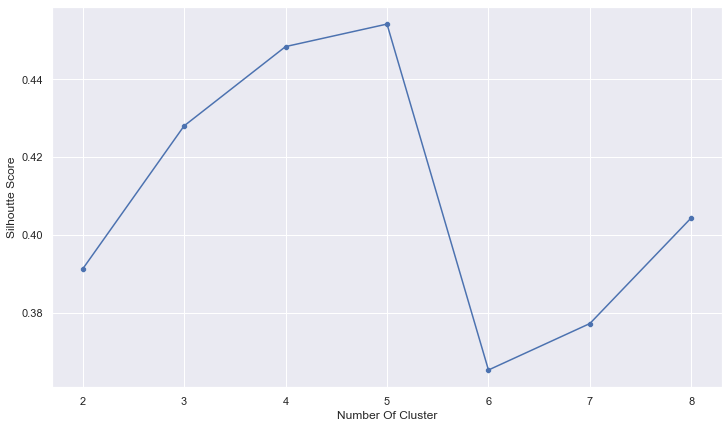

In [121]:
plt.figure(figsize = (12, 7))

sns.lineplot(number_of_clusters, score)
sns.scatterplot(number_of_clusters, score)

plt.xlabel("Number Of Cluster")
plt.ylabel('Silhoutte Score')

> Description:
- The best *Silhoutte Score* is obtained in cluster 6
- We decided not to use 6 *clusters* because the *clusters* that are formed are most likely only *customers* with *frequency* 1 time with low *monetary* and *customers* outside the *cluster*
- We will use 5 *clusters* because 5 *clusters* have the highest *silhoutte score* after 6

In [122]:
kmeans = KMeans(n_clusters=5, random_state=10)
kmeans.fit(x_scaled)

rfm['label k-means'] = kmeans.labels_

In [123]:
label = rfm['label k-means']
score = silhouette_score(x_scaled, label, metric = 'euclidean')
score

0.4542082335930818

In [124]:
def label(x):
  if x == 0:
    return 'New Customer'
  elif x == 1:
    return 'Hibernating'
  elif x == 2:
    return 'Need to focus'
  elif x == 3:
    return 'Potential loyalists'
  else:
    return 'VIP'

rfm['label k-means'] = rfm['label k-means'].apply(label)


- VIP : Customers who made transactions recently, frequently make transactions, and have the highest total transactions.
- Potential loyalists: Customers who make transactions with the highest total transactions.
- New Customer: A customer who made a recent transaction and only made 1 transaction.
- Need to focus: Customers who have not made transactions for a long time, but the frequency and total transactions are above the average of other customers.
- Hibernating : Customers who haven't made a transaction for a long time, only made one transaction, and the total transaction was small

In [125]:
# Jumlah Customer setiap segment
rfm['label k-means'].value_counts()

New Customer           34473
Hibernating            33918
Potential loyalists     2668
Need to focus           1588
VIP                      112
Name: label k-means, dtype: int64

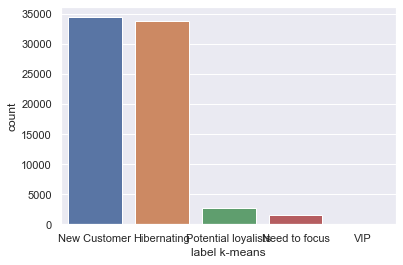

In [126]:
## Visualisasi
plt.figure(figsize = (6,4))
sns.countplot(x='label k-means', data = rfm)
plt.show()

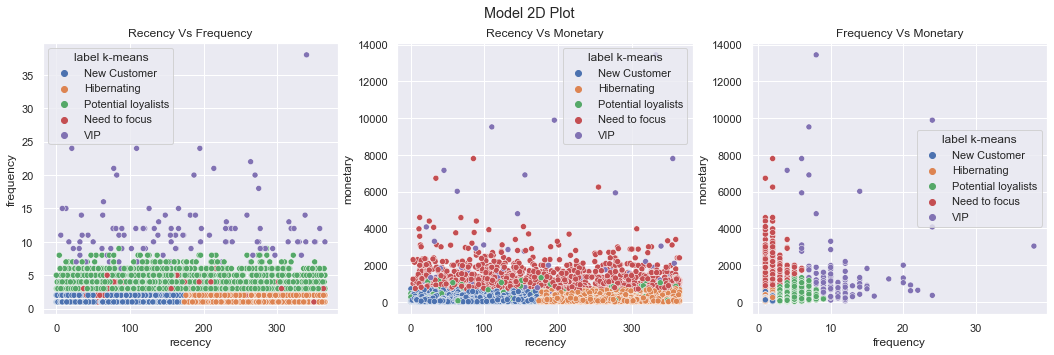

In [127]:
plt.figure(figsize =(18,5))

# Recency vs Frequency
plt.subplot(131)
sns.scatterplot(x = 'recency', y = 'frequency', hue = 'label k-means', data = rfm)
plt.title('Recency Vs Frequency')

# Recency Vs Monetary
plt.subplot(132)
sns.scatterplot(x = 'recency', y = 'monetary', hue = 'label k-means', data = rfm)
plt.title('Recency Vs Monetary')

# Frequency Vs Monetary
plt.subplot(133)
sns.scatterplot(x = 'frequency', y = 'monetary', hue = 'label k-means', data = rfm)
plt.title('Frequency Vs Monetary')

plt.suptitle('Model 2D Plot')
plt.show()

## Gaussian:
Gaussian is one of the *unsupervised learning* algorithms that can be used for *clustering*. The concept of this algorithm is to use *Expectation Maximazation (EM)* to determine the new *mean* and *variance*. Here's how the Gaussian algorithm works:
1. Determine the number of *clusters* you want to create
2. Determine the *mean* and *variance* values ​​of each *cluster* *randomly*
3. Calculate the *probability* of each data point to see which data belongs to *cluster* using the *Expectation Step*
4. Determine the new *mean* and *variance* values ​​using *maximazation Step*
5. Calculating *log-likelihood* to check convergence
6. Repeat step 3 onwards until you get stable results

Because this algorithm does not use the distance concept, but uses the *EM* concept, it does not require scaling

In [128]:
rfm = rfm[['recency', 'frequency', 'monetary']]

In [129]:
score2 = []
number_of_clusters = range(2,9)

for i in number_of_clusters:
  gsm = GaussianMixture(n_components=i)
  gsm.fit(x)

  label = gsm.predict(x)
  score2.append(silhouette_score(x_scaled, label, metric = 'euclidean'))

In [130]:
for i in range(len(score2)):
  print(f'Silhoutte Score untuk {i+2} Cluster', round(score2[i], 3))

Silhoutte Score untuk 2 Cluster 0.446
Silhoutte Score untuk 3 Cluster 0.352
Silhoutte Score untuk 4 Cluster 0.429
Silhoutte Score untuk 5 Cluster 0.322
Silhoutte Score untuk 6 Cluster 0.321
Silhoutte Score untuk 7 Cluster 0.27
Silhoutte Score untuk 8 Cluster 0.291


Text(0, 0.5, 'Silhoutte Score')

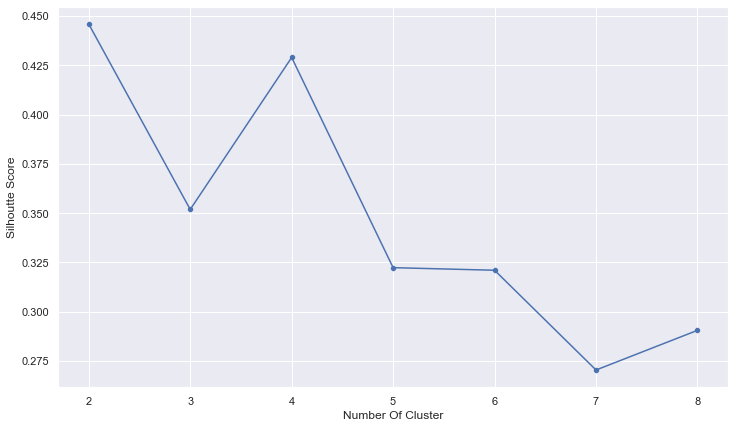

In [131]:
plt.figure(figsize = (12, 7))

sns.lineplot(number_of_clusters, score2)
sns.scatterplot(number_of_clusters, score2)

plt.xlabel("Number Of Cluster")
plt.ylabel('Silhoutte Score')

In [132]:
gsm = GaussianMixture(n_components=3)
gsm.fit(x)

rfm['label gaussian'] = gsm.predict(x)

In [133]:
rfm['label gaussian'].value_counts()

0    59990
2     7817
1     4952
Name: label gaussian, dtype: int64

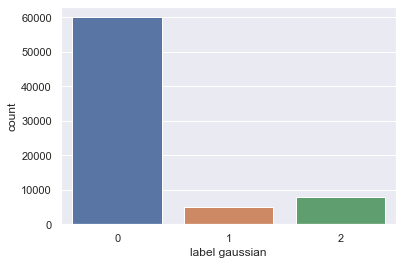

In [134]:
## Visualisasi
plt.figure(figsize = (6,4))
sns.countplot(x='label gaussian', data = rfm)
plt.show()

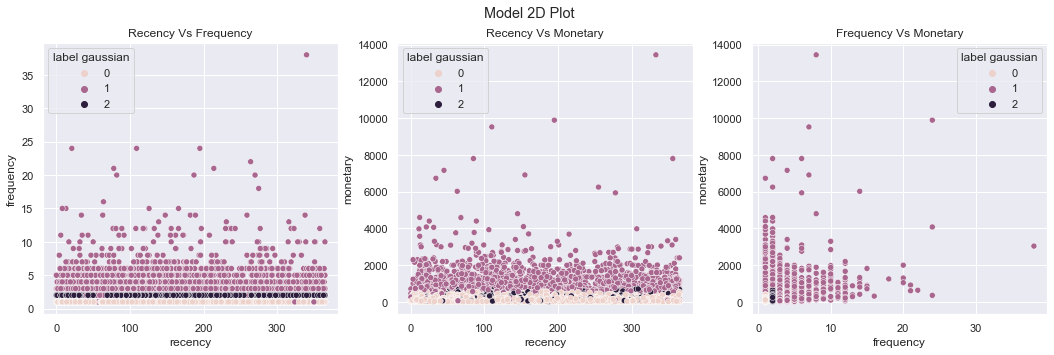

In [135]:
plt.figure(figsize =(18,5))

# Recency vs Frequency
plt.subplot(131)
sns.scatterplot(x = 'recency', y = 'frequency', hue = 'label gaussian', data = rfm)
plt.title('Recency Vs Frequency')

# Recency Vs Monetary
plt.subplot(132)
sns.scatterplot(x = 'recency', y = 'monetary', hue = 'label gaussian', data = rfm)
plt.title('Recency Vs Monetary')

# Frequency Vs Monetary
plt.subplot(133)
sns.scatterplot(x = 'frequency', y = 'monetary', hue = 'label gaussian', data = rfm)
plt.title('Frequency Vs Monetary')

plt.suptitle('Model 2D Plot')
plt.show()

# IV. Product Recommendation System
---
At this section, we want to make a recommendation system for the product. If we input a product ID number, this system will recomend product for this customer.
First, we gonna look at the order dataset.

In [136]:
df1.columns

Index(['order_id', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'price',
       'freight_value', 'purchase_year', 'purchase_month',
       'purchase_yearmonth', 'purchase_dayofweek', 'purchase_period',
       'month_num', 'time_to_delivery', 'diff_estimated_delivery',
       'payment_type', 'payment_value', 'recency', 'frequency', 'monetary'],
      dtype='object')

In [137]:
rec_data = pd.merge(df,products,on='product_id',how='left') 

In [138]:
df.columns


Index(['order_id', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'price',
       'freight_value', 'purchase_year', 'purchase_month',
       'purchase_yearmonth', 'purchase_dayofweek', 'purchase_period',
       'month_num', 'time_to_delivery', 'diff_estimated_delivery'],
      dtype='object')

In [139]:
rec_data =pd.read_csv('data/rec_data.csv',sep=',')

In [140]:
rec_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,...,d71da8fd8c6e3adef26be965f065b8a1,5,Vale a pena,Super adooorei o delineador ele é bem preto e ...,2018-04-28 00:00:00,2018-05-04 00:55:02,b1a1199364a4a7fe27c4486ab63f550d,13848,mogi-guacu,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,...,19866247db89845ef558ef19a6c26fcd,5,NaN,Excelente apontador! Em 3 segundos uma ponta p...,2018-02-17 00:00:00,2018-02-18 23:24:14,4b86049cb99e4aa774031daa9cd18f18,20551,rio de janeiro,RJ
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,...,32921b4e09c9a19d61fe46ce04231b84,5,NaN,NaN,2018-07-14 00:00:00,2018-07-16 16:20:04,f63805d9c7edb84d92413af34b86a39c,5821,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,...,70949d129965fb1ee32aaccec720a19e,1,produto divergente,modelo comprado: travesseiro memoria carinho B...,2018-08-07 00:00:00,2018-08-08 11:53:04,619e926d09b26efbd5180368b1ddc874,2018,sao paulo,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,...,74c9c7d0bc153bbbc92e4c1597b8ba55,5,NaN,NaN,2018-04-17 00:00:00,2018-04-18 04:29:47,ad353b4fb0e294adc4eda48af73e68a6,5835,sao paulo,SP


We only need particular columns, so we slice the dataset and define new dataset as order_rating.

In [141]:
rec_data_rating = rec_data.loc[:, ['customer_unique_id', 'product_id', 'review_score']]

In [142]:
rec_data_rating = rec_data_rating[rec_data_rating['product_id'].isin(
    rec_data_rating['product_id'].value_counts()[
        rec_data_rating['product_id'].value_counts() > 10].index)]

In [143]:
rec_data_rating = rec_data_rating.reset_index()

Moreover, we want to make a matrix between customers and products, and it will have score if the customer give review to particular products. The following is the matrix between customers and products.

In [144]:
ratings_utility_matrix = rec_data_rating.pivot_table(values='review_score',
                                                  index='customer_unique_id',
                                                  columns='product_id',
                                                  fill_value=0)
ratings_utility_matrix.head()

product_id,001b72dfd63e9833e8c02742adf472e3,00250175f79f584c14ab5cecd80553cd,005030ef108f58b46b78116f754d8d38,008cff0e5792219fae03e570f980b330,00ba6d766f0b1d7b78a5ce3e1e033263,00baba5b58e274d0332a0c8a0a66f877,00de7f393d962717eeeb2d7131a40dba,013ee64977aaa6b2b25475095162e0e9,014a8a503291921f7b004a5215bb3c36,0152f69b6cf919bcdaf117aa8c43e5a2,...,fe9dfbe7f974621789683b7b78be2a16,fecf6223a3494f35362f670e571d2a04,fed5c40c27e1c88560a9e92d82ee0825,ff29d8cb1cd0cd5ea37b80dac9939e1c,ff2c1ec09b1bb340e84f0d6b21cc7dbb,ff5f8606556b625613f069a5a9a48966,ff7fccf8513f360157f0660fe51d1d88,ffa7e0cbe11656d11a117b534bb1db27,ffaf0af7eebb57c7f262b51ebb05dfd6,ffc9caf33e2d1e9f44e3e06da19085f7
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0,0,0,0,0,0,0,0,0,0.0,...,0,0.0,0,0,0,0,0,0,0,0
00053a61a98854899e70ed204dd4bafe,0,0,0,0,0,0,0,0,0,0.0,...,0,0.0,0,0,0,0,0,0,0,0
0005e1862207bf6ccc02e4228effd9a0,0,0,0,0,0,0,0,0,0,0.0,...,0,0.0,0,0,0,0,0,0,0,0
0005ef4cd20d2893f0d9fbd94d3c0d97,0,0,0,0,0,0,0,0,0,0.0,...,0,0.0,0,0,0,0,0,0,0,0
0006fdc98a402fceb4eb0ee528f6a8d4,0,0,0,0,0,0,0,0,0,0.0,...,0,0.0,0,0,0,0,0,0,0,0


As we can see, the shape of the matrix is quite big.

In [145]:
ratings_utility_matrix.shape

(41154, 1670)

For easier analysis, we want to transpose the matrix and we can see the size below.

In [146]:
X = ratings_utility_matrix.T
X.head()

customer_unique_id,0000366f3b9a7992bf8c76cfdf3221e2,00053a61a98854899e70ed204dd4bafe,0005e1862207bf6ccc02e4228effd9a0,0005ef4cd20d2893f0d9fbd94d3c0d97,0006fdc98a402fceb4eb0ee528f6a8d4,00090324bbad0e9342388303bb71ba0a,000de6019bb59f34c099a907c151d855,000ed48ceeb6f4bf8ad021a10a3c7b43,0010fb34b966d44409382af9e8fd5b77,001147e649a7b1afd577e873841632dd,...,ffef0ffa736c7b3d9af741611089729b,fff1afc79f6b5db1e235a4a6c30ceda7,fff2ae16b99c6f3c785f0e052f2a9cfb,fff3a9369e4b7102fab406a334a678c3,fff7219c86179ca6441b8f37823ba3d3,fff96bc586f78b1f070da28c4977e810,fffbf87b7a1a6fa8b03f081c5f51a201,fffea47cd6d3cc0a88bd621562a9d061,ffff5962728ec6157033ef9805bacc48,ffffd2657e2aad2907e67c3e9daecbeb
product_id,,,,,,,,,,,,,,,,,,,,,
001b72dfd63e9833e8c02742adf472e3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00250175f79f584c14ab5cecd80553cd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
005030ef108f58b46b78116f754d8d38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
008cff0e5792219fae03e570f980b330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00ba6d766f0b1d7b78a5ce3e1e033263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next, I am going to define a function to build a recommendation system. This function will fit the data into the model. This function build using the truncated SVD matrix reducing the components to 10. This function output will be a correlation matrix for product pairwisely.

In [147]:
def fitsystemrecommendation(ratings_utility_matrix):
    X = ratings_utility_matrix.T
    SVD = TruncatedSVD(n_components=10)
    decomposed_matrix = SVD.fit_transform(X)
    correlation_matrix = np.corrcoef(decomposed_matrix)
    return correlation_matrix

In [148]:
from sklearn.decomposition import TruncatedSVD
correlation_matrix = fitsystemrecommendation(ratings_utility_matrix)

Moreover, I am gonna build a system recommendation function by inputing the product id, and this function will locate the first index found. Next, the function will show you the product that have high correlation with this product.


In [149]:
def systemrecommendation(prod_id):
    rec_data_rating.index[rec_data_rating['product_id'] == prod_id].tolist()[1]
    product_names = list(X.index)
    product_ID = product_names.index(prod_id)
    correlation_product_ID = correlation_matrix[product_ID]
    Recommend = list(X.index[correlation_product_ID > 0.70])
    Recommend.remove(prod_id)
    return pd.DataFrame(Recommend[0:9], columns=['Recommendation'])

For example, the following program show you the recommendation if you buy product with product id: 'ff2c1ec09b1bb340e84f0d6b21cc7dbb'.

In [150]:
systemrecommendation('ff2c1ec09b1bb340e84f0d6b21cc7dbb')

,Recommendation
0,00ba6d766f0b1d7b78a5ce3e1e033263
1,00baba5b58e274d0332a0c8a0a66f877
2,0152f69b6cf919bcdaf117aa8c43e5a2
3,01c9a70868bec5b748c67fcc26ce5895
4,02ee0862685e90b57cc241b7c9885f95
5,044f05bc9de36e8a693a83e4bc79dd0d
6,060c17562f97e5bb60bc0dfa4dd5b3f2
7,0654d3c1e3efc7e7cd9dbde9cb743df2
8,07821918ef487fd64eb20b3c8aeb897f


We can see the recommendation when we input product id: 'ff2c1ec09b1bb340e84f0d6b21cc7dbb'. By using the function I have defined, this recommendation have high correlation with the product. Therefore, I suggest the company to promote this recommendation product when the product inputted is purchased of viewed. 
